<a href="https://colab.research.google.com/github/workhardzy/K6312/blob/main/sentiment_analysis_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import time

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from IPython.display import display
import pickle
from tqdm.notebook import tqdm


loading data

In [ ]:
path = '/content/gdrive/My Drive/covid_mining/aclImdb/IMDB Dataset.csv' #this is from kaggle
df = pd.read_csv(path,encoding='UTF-8')
df.columns = ['Text','Label']

def recode_label(label):
    if label == 'positive':
        return 1
    else:
        return 0

df['Label'] = df['Label'].apply(lambda x: recode_label(x))
display(df)
df = df[['Text','Label']]
X = df['Text'].fillna('').tolist()
X = [str(i) for i in X]
y = df['Label'].fillna('').tolist()

,Text,Label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


Train test split

In [ ]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_STATE)


#text preprocessing

In [ ]:
from bs4 import BeautifulSoup
import nltk
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import re
import pickle


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#to remove html tags, lemmatisation . etc etc
additional_stop_words = []                                                      ########调 (optional)

def text_cleanup(text):  
    '''
    Text pre-processing
        return a sentence of cleaned words
    '''
    text = str(text)
    #remove html tags
    text_clean = BeautifulSoup(text, "lxml").text

    ## Convert to lowercase
    text_clean = text_clean.lower()
    ##Remove non-alphabet
    text_clean = re.sub(r'[^a-zA-Z]|(\w+:\/\/\S+)',' ', text_clean)

    ##spliting into tokens
    text_clean = text_clean.split()

    ##Remove short words (length < 3)
    text_clean = [w for w in text_clean if len(w)>2]

    ##Lemmatize text ## alternative is to use stemming
    #lemmatizer = WordNetLemmatizer()
    #text_clean = [lemmatizer.lemmatize(w) for w in text_clean]
    
    #ps = PorterStemmer()
    #text_clean = [ps.stem(w) for w in text_clean]
    
    ## Filter out stop words in English 
    stops = set(stopwords.words('english')).union(additional_stop_words)
    text_clean = [w for w in text_clean if w not in stops]
    
    #joining the list into a sentence
    mySeparator = " "
    text_clean = mySeparator.join(text_clean)


    return text_clean

txt = r"This movie is not based on the bible. It completely leaves Christ out of the movie. They do not show the rapture or the second coming of Christ. Let alone talk about it. It does not quote from scriptures. The end times are called the great tribulation. The movie does not even show bad times. The seven bowls, seven viles and seven trumpets of judgements are boiled down to a 15 second news cast of the sea changing it's structure. The anti-Christ was killed 3 1/2 years into the tribulation and that is how the movie ended. The only part they got correct was there was two prophets. The did not use there names of course because that would be too close to the truth of scriptures. The worst part of it was I really wanted it to be a good movie. I wanted to take unsaved people to it. I feel that the movie is evil. It is a counterfeit just like everything the devil does. I just hope it does not take away from the upcoming movie based on the left behind books.<br /><br />The second problem with the movie is it was just bad. Bad acting, bad special effects, bad plot and poor character development. I have seen better episodes of Miami vice."
print('ORIGINAL','\n', txt)
text_cleanup(txt)

ORIGINAL 
 This movie is not based on the bible. It completely leaves Christ out of the movie. They do not show the rapture or the second coming of Christ. Let alone talk about it. It does not quote from scriptures. The end times are called the great tribulation. The movie does not even show bad times. The seven bowls, seven viles and seven trumpets of judgements are boiled down to a 15 second news cast of the sea changing it's structure. The anti-Christ was killed 3 1/2 years into the tribulation and that is how the movie ended. The only part they got correct was there was two prophets. The did not use there names of course because that would be too close to the truth of scriptures. The worst part of it was I really wanted it to be a good movie. I wanted to take unsaved people to it. I feel that the movie is evil. It is a counterfeit just like everything the devil does. I just hope it does not take away from the upcoming movie based on the left behind books.<br /><br />The second prob

'movie based bible completely leaves christ movie show rapture second coming christ let alone talk quote scriptures end times called great tribulation movie even show bad times seven bowls seven viles seven trumpets judgements boiled second news cast sea changing structure anti christ killed years tribulation movie ended part got correct two prophets use names course would close truth scriptures worst part really wanted good movie wanted take unsaved people feel movie evil counterfeit like everything devil hope take away upcoming movie based left behind books second problem movie bad bad acting bad special effects bad plot poor character development seen better episodes miami vice'

In [ ]:
from tqdm.notebook import tqdm
#for text preprocessing #you can run without doing so

#doing list comprehension
X_train = [text_cleanup(txt) for txt in tqdm(X_train)]
X_test = [text_cleanup(txt) for txt in tqdm(X_test)]

In [ ]:
X_train[:5]

['congo based best selling novel michael crichton thought lacked crichton usual charm smart characters punch well sorry say goes film plot greed bad simple morality tale cautions megalomaniacal joe baker sends son dangerous african congo quest source diamonds large enough pure enough function powerful laser communications transmitter laser weapons contact lost son team daughter law laura linney former cia operative computer freak sent quest accompanied gee whiz gadgetry eccentric characters including mercenary ernie hudson researcher talking gorilla dylan walsh nutty indiana jones type looking king solomon mines tim curry narrow escapes surface air missiles african wildlife discover often want turns source downfall actors movie talented dylan walsh acts like pathetic crybaby especially end ernie hudson unconvincing wonder went star films laura linney nothing special think safely say talented actors film small roles joe baker tim curry always enjoyable actor although sometimes scarred l

In [ ]:
#do use tfidf if you think it helps
#if need be, can try to use word embeddings

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() 
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)


In [ ]:
X_train[0]

<1x75377 sparse matrix of type '<class 'numpy.int64'>'
	with 160 stored elements in Compressed Sparse Row format>

In [ ]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Truth')
  plt.xlabel('Predicted');


# Testing Machine Learning approaches

Logistic Regression

In [ ]:
#LR
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=400,random_state=42)
model.fit(X_train, y_train)
print('accuracy:',model.score(X_test,y_test))

#classification report
y_pred = model.predict(X_test) 

print(classification_report(y_test, y_pred))


accuracy: 0.8784
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12483
           1       0.87      0.89      0.88     12517

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



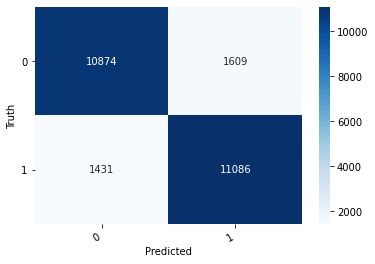

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
filename = '/content/gdrive/My Drive/covid_mining/LR_model.h5'
pickle.dump(model, open(filename, 'wb'))

SVM

In [ ]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [ ]:
svmModel = svm.SVC(C = 1,kernel = 'linear')
svmModel.fit(X_train,y_train)
print('accuracy:',svmModel.score(X_test,y_test))

#classification report
y_pred = svmModel.predict(X_test) 

print(classification_report(y_test, y_pred))

accuracy: 0.85588
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     12483
           1       0.85      0.86      0.86     12517

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



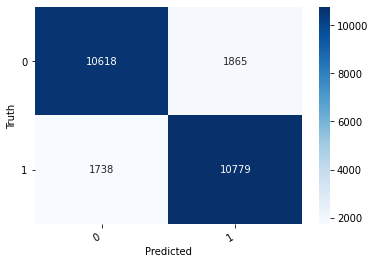

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
filename = '/content/gdrive/My Drive/covid_mining/SVM_model.h5'
pickle.dump(svmModel, open(filename, 'wb'))

Ensemble Learning AdaBoostClassifier


In [ ]:
#source: https://machinelearningmastery.com/adaboost-ensemble-in-python/
from sklearn.ensemble import AdaBoostClassifier

model= AdaBoostClassifier(random_state=1)            
model.fit(X_train, y_train)
print('accuracy:',model.score(X_test,y_test))

#classification report
y_pred = model.predict(X_test) 

cm = confusion_matrix(y_test, y_pred) 
print(cm) 

print(classification_report(y_test, y_pred))

# without text preprocessing 0.69824
# with text preprocessing 0.69844

accuracy: 0.80316
[[ 9455  3028]
 [ 1893 10624]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     12483
           1       0.78      0.85      0.81     12517

    accuracy                           0.80     25000
   macro avg       0.81      0.80      0.80     25000
weighted avg       0.81      0.80      0.80     25000



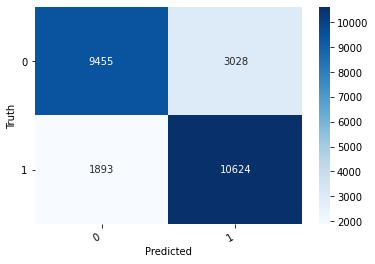

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
filename = '/content/gdrive/My Drive/covid_mining/Ada_model.h5'
pickle.dump(model, open(filename, 'wb'))

Gradient Boosting

In [ ]:
#source: https://machinelearningmastery.com/adaboost-ensemble-in-python/
from sklearn.ensemble import GradientBoostingClassifier

model= GradientBoostingClassifier(random_state=1)            
model.fit(X_train, y_train)
print('accuracy:',model.score(X_test,y_test))

#classification report
y_pred = model.predict(X_test) 

cm = confusion_matrix(y_test, y_pred) 
print(cm) 

print(classification_report(y_test, y_pred))

# without text preprocessing 0.69824
# with text preprocessing 0.69844

accuracy: 0.80576
[[ 9301  3182]
 [ 1674 10843]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.79     12483
           1       0.77      0.87      0.82     12517

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



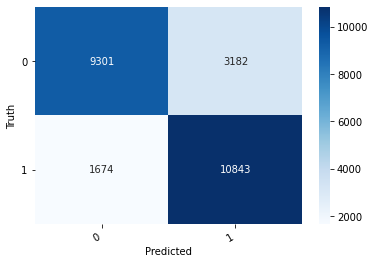

In [ ]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
filename = '/content/gdrive/My Drive/covid_mining/GB_model.h5'
pickle.dump(model, open(filename, 'wb'))

#Manually annotating a sample (completed)

In [ ]:
# this part is for randomly choose 100 data to annotate manually, and has completed
'''
news_df = pd.read_csv('/content/gdrive/My Drive/covid_mining/covid19_articles_20200914.csv').drop(['Unnamed: 0'],axis=1)
news_df.head()
'''

SyntaxError: ignored

In [ ]:
#news_df_sample = news_df.sample(100)

In [ ]:
#loading model
'''
filename = '/content/gdrive/My Drive/covid_mining/LR_model.h5'
LR_model = pickle.load(open(filename, 'rb'))

filename = '/content/gdrive/My Drive/covid_mining/Ada_model.h5'
ada_model = pickle.load(open(filename, 'rb'))


In [ ]:
'''
def label_text(text,model,vect):
    text = vect.transform([text])
    return model.predict(text).flatten()[0]

def label_prob(text,model,vect):
    text = vect.transform([text])
    return model.predict_proba(text).flatten()

In [ ]:
'''
for i in range(20):
    print(label_text(news_df['title'][i],LR_model,count_vect))

In [ ]:
#using LR
'''
from tqdm import tqdm
tqdm.pandas()

news_df_sample['predicted']  = news_df_sample['title'].progress_apply(lambda x: label_text(x,LR_model,count_vect))
news_df_sample['predicted_proba']  = news_df_sample['title'].progress_apply(lambda x: label_prob(x,LR_model,count_vect))

In [ ]:
#news_df_sample

In [ ]:
'''
news_df_sample = news_df_sample[['title','url','date','predicted','predicted_proba']]
news_df_sample

In [ ]:
'''
news_df_sample.to_csv('/content/gdrive/My Drive/covid_mining/sentiment_manual_validation_set.csv')

Creating a proper gold standard dataset

#Evaluating model's performance on the out-of-distribution set


In [ ]:
path = '/content/gdrive/My Drive/covid_mining/annotated_sentiment_manual_validation_set.csv' #this is from our manually annotated sentiment set
val_df = pd.read_csv(path,encoding='UTF-8')


In [ ]:
#loading model
filename = '/content/gdrive/My Drive/covid_mining/LR_model.h5'
LR_model = pickle.load(open(filename, 'rb'))

filename = '/content/gdrive/My Drive/covid_mining/Ada_model.h5'
ada_model = pickle.load(open(filename, 'rb'))

filename = '/content/gdrive/My Drive/covid_mining/GB_model.h5'
GB_model = pickle.load(open(filename, 'rb'))

filename = '/content/gdrive/My Drive/covid_mining/SVM_model.h5'
SVM_model = pickle.load(open(filename, 'rb'))

In [ ]:
def label_text(text,model,vect):
    text = vect.transform([text])
    return model.predict(text).flatten()[0]

def label_prob(text,model,vect):
    text = vect.transform([text])
    return model.predict_proba(text).flatten()

In [ ]:
val_df.columns

Index(['Unnamed: 0', 'title', 'url', 'date', 'predicted', 'predicted_proba',
       'xy_predict', 'zy_predict', 'vote_label', 'Unnamed: 9', 'is_correct'],
      dtype='object')

In [ ]:
val_df = val_df[['title','vote_label']].dropna()
val_df.columns = ['X','y']
y_test = val_df.y.tolist()

In [ ]:
#classification report for LR
y_pred = [label_text(x,LR_model,count_vect) for x in val_df.X]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.38      0.47        56
         1.0       0.48      0.73      0.58        44

    accuracy                           0.53       100
   macro avg       0.56      0.55      0.52       100
weighted avg       0.57      0.53      0.52       100



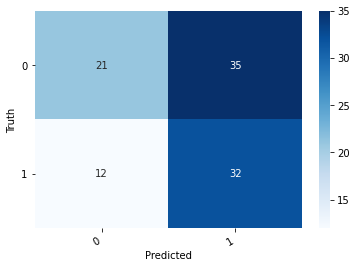

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
#classification report for SVM
y_pred = [label_text(x,SVM_model,count_vect) for x in val_df.X]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.36      0.46        56
         1.0       0.48      0.75      0.58        44

    accuracy                           0.53       100
   macro avg       0.56      0.55      0.52       100
weighted avg       0.57      0.53      0.51       100



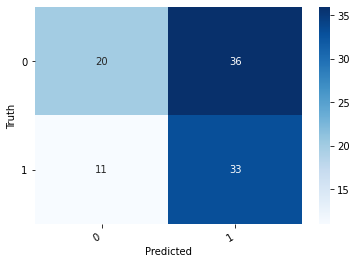

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
#classification report for ada
y_pred = [label_text(x,ada_model,count_vect) for x in val_df.X]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04        56
         1.0       0.44      1.00      0.62        44

    accuracy                           0.45       100
   macro avg       0.72      0.51      0.33       100
weighted avg       0.76      0.45      0.29       100



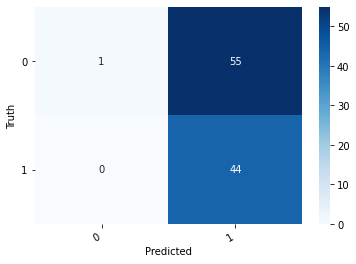

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
#classification report for GB
y_pred = [label_text(x,GB_model,count_vect) for x in val_df.X]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04        56
         1.0       0.44      1.00      0.62        44

    accuracy                           0.45       100
   macro avg       0.72      0.51      0.33       100
weighted avg       0.76      0.45      0.29       100



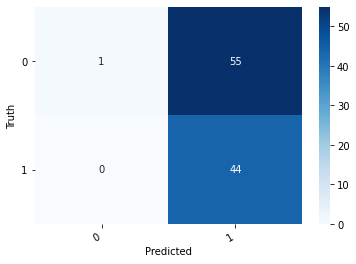

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
#classification report for CNN model (done in a different script)
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences

import pickle
from keras.models import load_model

maxlen = max(len(x) for x in X) # longest text in X

with open('/content/gdrive/My Drive/covid_mining/tokenizer.pickle', 'rb') as handle:
    cnn_tokenizer = pickle.load(handle)

model_load = load_model('/content/gdrive/My Drive/covid_mining/CNN_model.h5')

def cnn_label_text(text,model,tokenizer):
    X_sample = [text]
    X_sample = tokenizer.texts_to_sequences(X_sample)
    X_sample = pad_sequences(X_sample, padding='post', maxlen=maxlen)

    pred = int(model.predict(X_sample).flatten()[0] > 0.5)
    
    return pred

y_pred = [cnn_label_text(x,model_load,cnn_tokenizer) for x in val_df.X]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.39      0.48        56
         1.0       0.48      0.70      0.57        44

    accuracy                           0.53       100
   macro avg       0.55      0.55      0.53       100
weighted avg       0.56      0.53      0.52       100



implementing Vader lexicon

In [ ]:
path = '/content/gdrive/My Drive/covid_mining/annotated_sentiment_manual_validation_set.csv' #this is from our manually annotated sentiment set
val_df = pd.read_csv(path,encoding='UTF-8')

val_df = val_df[['title','vote_label']].dropna()
val_df.columns = ['X','y']
y_test = val_df.y.tolist()
X_test = val_df.X.tolist()

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in X_test:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

print(results[:3])

df = pd.DataFrame.from_records(results)

df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = 0
df.head()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.6705, 'headline': 'How Gen Z is using art and creativity to improve their mental health'}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': "Danny Meyer: 'Restaurants are not going to be back full force by June'"}, {'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'compound': -0.5994, 'headline': 'Bolivia’s Covid Death Rate Soared As Politicians Clashed'}]


,neg,neu,pos,compound,headline,label
0,0.000,0.645,0.355,0.6705,How Gen Z is using art and creativity to impro...,1
1,0.000,1.000,0.000,0.0000,Danny Meyer: 'Restaurants are not going to be ...,0
2,0.358,0.642,0.000,-0.5994,Bolivia’s Covid Death Rate Soared As Politicia...,0
3,0.000,1.000,0.000,0.0000,The ‘Green Shoots’ at PVH,0
4,0.000,0.704,0.296,0.2732,Nexera Energy : Q2 2020 Remarks | MarketScreener,1


In [ ]:
def label_vader(X_test):
    sia = SIA()
    results = []

    for line in X_test:
        pol_score = sia.polarity_scores(line)
        pol_score['headline'] = line
        results.append(pol_score)

    #print(results[:3])

    df = pd.DataFrame.from_records(results)

    df['label'] = 0
    df.loc[df['compound'] > 0.2, 'label'] = 1
    df.loc[df['compound'] < -0.2, 'label'] = 0
    return df.label.tolist()

label_vader(X_test)

[1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0]

In [ ]:
print(classification_report(y_test, df.label))

              precision    recall  f1-score   support

         0.0       0.64      0.80      0.71        56
         1.0       0.63      0.43      0.51        44

    accuracy                           0.64       100
   macro avg       0.64      0.62      0.61       100
weighted avg       0.64      0.64      0.63       100



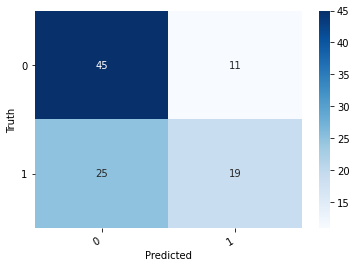

In [ ]:
cm = confusion_matrix(y_test, df.label)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

Hard voting between LR, Vader, AdaBoost, GB, CNN




In [ ]:
LR_y_pred = [label_text(x,LR_model,count_vect) for x in val_df.X]
SVM_y_pred = [label_text(x,SVM_model,count_vect) for x in val_df.X]
ADA_y_pred = [label_text(x,ada_model,count_vect) for x in val_df.X]
vader_y_pred = label_vader(X_test)
GB_y_pred = [label_text(x,GB_model,count_vect) for x in val_df.X]
cnn_y_pred = [cnn_label_text(x,model_load,cnn_tokenizer) for x in val_df.X]

vdf = [pd.Series(LR_y_pred),pd.Series(SVM_y_pred),pd.Series(ADA_y_pred),pd.Series(vader_y_pred),pd.Series(GB_y_pred),pd.Series(cnn_y_pred)]
vdf = pd.concat(vdf,axis=1)
vdf.columns = ['LR_predict','SVM','ADA','Vader','GB','CNN']
vdf

,LR_predict,SVM,ADA,Vader,GB,CNN
0,0,0,1,1,1,1
1,0,1,1,0,1,1
2,1,1,1,0,1,0
3,1,1,1,0,1,1
4,0,1,1,1,1,1
...,...,...,...,...,...,...
95,1,1,1,1,1,1
96,1,1,1,1,1,1
97,0,0,1,0,1,0
98,1,1,1,1,1,1


In [ ]:
y_pred = vdf.mode(axis='columns', numeric_only=True)[0].tolist()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.29      0.39        56
         1.0       0.45      0.75      0.56        44

    accuracy                           0.49       100
   macro avg       0.52      0.52      0.47       100
weighted avg       0.53      0.49      0.46       100



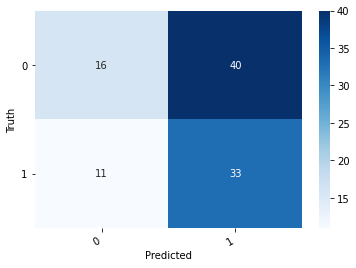

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
vdf = [pd.Series(LR_y_pred),pd.Series(vader_y_pred),pd.Series(cnn_y_pred)]
vdf = pd.concat(vdf,axis=1)
vdf.columns = ['LR_predict','Vader','CNN']
vdf

,LR_predict,Vader,CNN
0,0,1,1
1,0,0,1
2,1,0,0
3,1,0,1
4,0,1,1
...,...,...,...
95,1,1,1
96,1,1,1
97,0,0,0
98,1,1,1


In [ ]:
y_pred = vdf.mode(axis='columns', numeric_only=True)[0].tolist()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.52      0.57        56
         1.0       0.51      0.64      0.57        44

    accuracy                           0.57       100
   macro avg       0.58      0.58      0.57       100
weighted avg       0.58      0.57      0.57       100



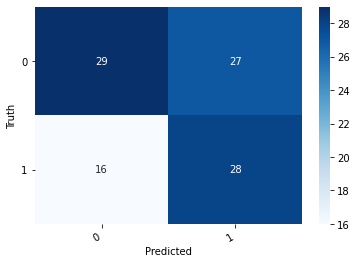

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
vdf = [pd.Series(LR_y_pred),pd.Series(vader_y_pred)]
vdf = pd.concat(vdf,axis=1)
vdf.columns = ['LR_predict','Vader']
vdf

,LR_predict,Vader
0,0,1
1,0,0
2,1,0
3,1,0
4,0,1
...,...,...
95,1,1
96,1,1
97,0,0
98,1,1


In [ ]:
y_pred = vdf.mode(axis='columns', numeric_only=True)[0].tolist()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.93      0.75        56
         1.0       0.78      0.32      0.45        44

    accuracy                           0.66       100
   macro avg       0.71      0.62      0.60       100
weighted avg       0.70      0.66      0.62       100



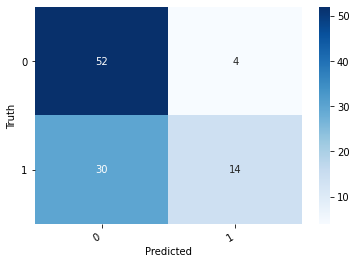

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
vdf = [pd.Series(vader_y_pred),pd.Series(cnn_y_pred)]
vdf = pd.concat(vdf,axis=1)
vdf.columns = ['Vader','cnn']
vdf

,Vader,cnn
0,1,1
1,0,1
2,0,0
3,0,1
4,1,1
...,...,...
95,1,1
96,1,1
97,0,0
98,1,1


In [ ]:
y_pred = vdf.mode(axis='columns', numeric_only=True)[0].tolist()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.88      0.74        56
         1.0       0.70      0.36      0.48        44

    accuracy                           0.65       100
   macro avg       0.67      0.62      0.61       100
weighted avg       0.66      0.65      0.62       100



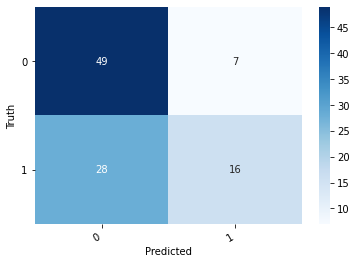

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
vdf = [pd.Series(LR_y_pred),pd.Series(cnn_y_pred)]
vdf = pd.concat(vdf,axis=1)
vdf.columns = ['LR_predict','CNN']
vdf

,LR_predict,CNN
0,0,1
1,0,1
2,1,0
3,1,1
4,0,1
...,...,...
95,1,1
96,1,1
97,0,0
98,1,1


In [ ]:
y_pred = vdf.mode(axis='columns', numeric_only=True)[0].tolist()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.61      0.63        56
         1.0       0.54      0.59      0.57        44

    accuracy                           0.60       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.60      0.60      0.60       100



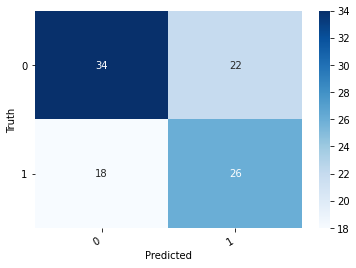

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

In [ ]:
vdf = [pd.Series(LR_y_pred),pd.Series(SVM_y_pred),pd.Series(vader_y_pred),pd.Series(cnn_y_pred)]
vdf = pd.concat(vdf,axis=1)
vdf.columns = ['LR_predict','SVM','Vader','CNN']
vdf

,LR_predict,SVM,Vader,CNN
0,0,0,1,1
1,0,1,0,1
2,1,1,0,0
3,1,1,0,1
4,0,1,1,1
...,...,...,...,...
95,1,1,1,1
96,1,1,1,1
97,0,0,0,0
98,1,1,1,1


In [ ]:
y_pred = vdf.mode(axis='columns', numeric_only=True)[0].tolist()
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.59      0.62        56
         1.0       0.54      0.61      0.57        44

    accuracy                           0.60       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.61      0.60      0.60       100



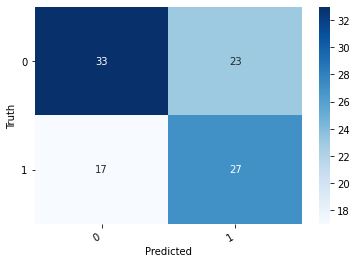

In [ ]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

# Using a good performing model strategy to label all data

In [ ]:
path = '/content/gdrive/My Drive/covid_mining/covid19_articles_20200914.csv'
df = pd.read_csv(path,encoding='UTF-8')

In [ ]:
#loading model
filename = '/content/gdrive/My Drive/covid_mining/LR_model.h5'
LR_model = pickle.load(open(filename, 'rb'))

filename = '/content/gdrive/My Drive/covid_mining/SVM_model.h5'
SVM_model = pickle.load(open(filename, 'rb'))

def label_text(text,model,vect):
    text = vect.transform([text])
    return model.predict(text).flatten()[0]

def label_prob(text,model,vect):
    text = vect.transform([text])
    return model.predict_proba(text).flatten()

In [ ]:
df.columns

Index(['Unnamed: 0', 'title', 'url', 'crawled_time', 'date', 'domain',
       'author', 'content', 'topic_area'],
      dtype='object')

In [ ]:
lab_df = df[['title','date','topic_area']].dropna()
lab_df.columns = ['X','date','topic_area']
lab_df[:5]

,X,date,topic_area
0,Three Industrial Giants You Should Own In 2020,2020-01-02,business
1,"Tesla (TSLA) Breaks Shipment Record, Beats Est...",2020-01-03,business
2,Labor Stocks Are Going To Break Out In 2020,2020-01-03,business
3,Cal-Maine Just Shed 12% - But Is Now The Time ...,2020-01-06,business
4,"China pneumonia outbreak: It's not SARS, so wh...",2020-01-06,business


In [ ]:
#split the file by month first, otherwise the file is too large to process
for x in range(1,10):
  mon = '0'+str(x)
  mon_df = lab_df[lab_df['date'].apply(lambda x:x[5:7]) == mon]
  print(mon_df[:5])
  path = '/content/gdrive/My Drive/covid_mining/'+ str(x) +'_sentiment.csv'
  mon_df.to_csv(path)

                                                   X        date topic_area
0     Three Industrial Giants You Should Own In 2020  2020-01-02   business
1  Tesla (TSLA) Breaks Shipment Record, Beats Est...  2020-01-03   business
2        Labor Stocks Are Going To Break Out In 2020  2020-01-03   business
3  Cal-Maine Just Shed 12% - But Is Now The Time ...  2020-01-06   business
4  China pneumonia outbreak: It's not SARS, so wh...  2020-01-06   business
                                                      X        date topic_area
1953  Eighth US case of new coronavirus confirmed in...  2020-02-01    finance
1954  Japan seeks to contain economic impact of viru...  2020-02-01   business
1955  Coronavirus just starting to have an impact on...  2020-02-01    finance
1956  India announces $40 billion spending on farms,...  2020-02-01   business
1957  India's govt to spend $40 billion on farm sect...  2020-02-01   business
                                                      X        date to

In [ ]:
#split july into 4 file, because july still has too much data
path = '/content/gdrive/My Drive/covid_mining/7_sentiment.csv'
jul_df = pd.read_csv(path,encoding='UTF-8')
jul_df1 = jul_df[:20000]
pathout = '/content/gdrive/My Drive/covid_mining/7_1_sentiment.csv'
jul_df1.to_csv(pathout)

In [ ]:
jul_df2 = jul_df[20000:40000]
pathout = '/content/gdrive/My Drive/covid_mining/7_2_sentiment.csv'
jul_df2.to_csv(pathout)

In [ ]:
jul_df3 = jul_df[40000:60000]
pathout = '/content/gdrive/My Drive/covid_mining/7_3_sentiment.csv'
jul_df3.to_csv(pathout)

In [ ]:
jul_df4 = jul_df[60000:]
pathout = '/content/gdrive/My Drive/covid_mining/7_4_sentiment.csv'
jul_df4.to_csv(pathout)

In [ ]:
# label all data by file
for i in ['1','2','3','4','5','6','7_1','7_2','7_3','7_4','8','9']:
  # open and read files
  pathin = '/content/gdrive/My Drive/covid_mining/'+ str(i) +'_sentiment.csv'
  pathout = '/content/gdrive/My Drive/covid_mining/'+ str(i) +'_sentiment_labled.csv'
  print('start'+str(i))
  lab_df = pd.read_csv(pathin,encoding='UTF-8')
  # use the combination of LR, vader, CNN to label data
  LR_lab = [label_text(x,LR_model,count_vect) for x in lab_df.X]
  vader_lab = label_vader(lab_df.X.tolist())
  cnn_lab = [cnn_label_text(x,model_load,cnn_tokenizer) for x in lab_df.X]
  print('label done'+str(i))
  # use the hard vote result as final label
  lab = [pd.Series(LR_lab),pd.Series(vader_lab),pd.Series(cnn_lab)]
  lab = pd.concat(lab,axis=1)
  lab.columns = ['LR_predict','Vader','CNN']
  lables = lab.mode(axis='columns', numeric_only=True)[0].tolist()
  # add label
  lab_df['sen_label'] = lables
  print(lab_df[:5])
  # output to file
  lab_df.to_csv(pathout)

start7_1
lable done7_1
   Unnamed: 0  Unnamed: 0.1  ... topic_area sen_label
0           0        175531  ...   business         0
1           1        175532  ...   business         0
2           2        175533  ...   business         0
3           3        175534  ...   business         0
4           4        175535  ...   business         1

[5 rows x 6 columns]
start7_2
lable done7_2
   Unnamed: 0  Unnamed: 0.1  ... topic_area sen_label
0       20000        195531  ...   business         0
1       20001        195532  ...   business         0
2       20002        195533  ...   business         0
3       20003        195534  ...   business         0
4       20004        195535  ...   business         0

[5 rows x 6 columns]
start7_3
lable done7_3
   Unnamed: 0  Unnamed: 0.1  ... topic_area sen_label
0       40000        215531  ...   business         1
1       40001        215532  ...   business         0
2       40002        215533  ...   business         0
3       40003        21